In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [127]:
df = pd.read_csv('ds_mulakat.csv')

/var/folders/ll/svcq3_v57v9dwq0lwqhp4vpc0000gn/T/ipykernel_23703/1932288225.py:1: DtypeWarning: Columns (102,116) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ds_mulakat.csv')


### Veri Keşfi Ve Temizleme

In [214]:
df.shape

(160983, 165)

In [8]:
df.head()

,sync_name,source_address,destination_address,source_port,destination_port,protocol,app_protocol,application_name,application_category_name,master_application_name,tunnel_source_address,tunnel_destination_address,source_mac,destination_mac,tunnel_value,package_count,login_fail_count,login_success,expiration_id,drop_eligible,priority,vlan_identifier,event_time,bidirectional_first_seen_ms,bidirectional_last_seen_ms,bidirectional_duration_ms,bidirectional_bytes,bidirectional_max_piat_ms,bidirectional_max_ps,bidirectional_mean_piat_ms,bidirectional_mean_ps,bidirectional_min_piat_ms,bidirectional_min_ps,bidirectional_packets,bidirectional_stddev_piat_ms,bidirectional_stddev_ps,bidirectional_syn_packets,bidirectional_cwr_packets,bidirectional_ece_packets,bidirectional_urg_packets,bidirectional_ack_packets,bidirectional_psh_packets,bidirectional_rst_packets,bidirectional_fin_packets,src2dst_first_seen_ms,src2dst_last_seen_ms,src2dst_duration_ms,src2dst_packets,src2dst_bytes,src2dst_max_piat_ms,src2dst_max_ps,src2dst_mean_piat_ms,src2dst_mean_ps,src2dst_min_piat_ms,src2dst_min_ps,src2dst_stddev_piat_ms,src2dst_stddev_ps,src2dst_syn_packets,src2dst_cwr_packets,src2dst_ece_packets,src2dst_urg_packets,src2dst_ack_packets,src2dst_psh_packets,src2dst_rst_packets,src2dst_fin_packets,dst2src_first_seen_ms,dst2src_last_seen_ms,dst2src_duration_ms,dst2src_packets,dst2src_bytes,dst2src_max_piat_ms,dst2src_max_ps,dst2src_mean_piat_ms,dst2src_mean_ps,dst2src_min_piat_ms,dst2src_min_ps,dst2src_stddev_piat_ms,dst2src_stddev_ps,dst2src_syn_packets,dst2src_cwr_packets,dst2src_ece_packets,dst2src_urg_packets,dst2src_ack_packets,dst2src_psh_packets,dst2src_rst_packets,dst2src_fin_packets,is_username,username,username_arr,is_hostname,source_hostname,source_hostname_arr,destination_hostname,destination_hostname_arr,domain,domain_arr,dns_query_name,dns_query_len,dns_query_type,dns_answer_name,dns_answer_len,dns_answer_type,dns_answer_addresses,dns_not_exist,dns_server_direction,dns_query_main_domain,dns_query_sub_domain,dns_query_has_sub_domain,DNS,status,status_code,request_host,request_type,request_uri,request_uri_arr,user_agent,first_http_post_body,http_request,bidirectional_http_request_count,bidirectional_get_request_count,bidirectional_get_request_bytes,bidirectional_post_request_count,bidirectional_post_request_bytes,src2dst_get_request_bytes,src2dst_post_request_bytes,dst2src_get_request_bytes,dst2src_post_request_bytes,HTTP,ja3_client,ja3_server,mail_sender,mail_recipient,file_transport,ntlmssp_auth_seen,LdapUserInfo,ICMP,SMB2Status,Flow_Risks,Kerberos,server_side_using_capability,UserBehavior,personnel_info,DeviceOnNetwork,direction,day,day_of_week,hour_of_day,location_id,bidirectional_first_seen_ms_ts,bidirectional_last_seen_ms_ts,sourceCountry,destinationCountry,sourceGeoPoint,destinationGeoPoint,src_asn,dst_asn,nbns_conflict_count,ndr_name,source_type,destination_type,session_id,session_id_from_time,protocol_name,source_asset_type,destination_asset_type
0,master-node,192.168.2.100,192.168.0.1,0,0,0,1000,ARP-Request,ARP,ARP,NaN,NaN,00:50:56:a6:4d:5e,ff:ff:ff:ff:ff:ff,0,1,0,0,0,False,0,0,2024-03-18T14:07:19.738372034Z,1710770835765056,1710770835765056,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,False,NotFound,[''NotFound''],False,exc03,[''\x12\x04\x10exc03''],192.168.0.1,NaN,NotFound,[''NotFound''],NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,"{''large_package_count'': 0, ''dns_query_count...",NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,{''reversed'': False},NaN,NaN,NotFound,NaN,False,False,"{''user_name'': '''', ''title_name'': '''', ''...","{''icmp_type_code'': 0, ''icmp_type'': 0, ''ic...","{''smb2message_id'': None, ''smb2file_message_...","{''risk'': '''', ''risk_severity'': '''', ''ri...","{''auth_service_status'': False, ''tag_status'...",NaN,"{''type'': ''Internal'', ''country'': '''', ''...","{''department'': '''', ''title'': '''', ''user...

In [9]:
df.describe()

,source_port,destination_port,protocol,app_protocol,tunnel_source_address,tunnel_destination_address,tunnel_value,package_count,login_fail_count,login_success,expiration_id,priority,vlan_identifier,bidirectional_first_seen_ms,bidirectional_last_seen_ms,bidirectional_duration_ms,bidirectional_bytes,bidirectional_max_piat_ms,bidirectional_max_ps,bidirectional_mean_piat_ms,bidirectional_mean_ps,bidirectional_min_piat_ms,bidirectional_min_ps,bidirectional_packets,bidirectional_stddev_piat_ms,bidirectional_stddev_ps,bidirectional_syn_packets,bidirectional_cwr_packets,bidirectional_ece_packets,bidirectional_urg_packets,bidirectional_ack_packets,bidirectional_psh_packets,bidirectional_rst_packets,bidirectional_fin_packets,src2dst_first_seen_ms,src2dst_last_seen_ms,src2dst_duration_ms,src2dst_packets,src2dst_bytes,src2dst_max_piat_ms,src2dst_max_ps,src2dst_mean_piat_ms,src2dst_mean_ps,src2dst_min_piat_ms,src2dst_min_ps,src2dst_stddev_piat_ms,src2dst_stddev_ps,src2dst_syn_packets,src2dst_cwr_packets,src2dst_ece_packets,src2dst_urg_packets,src2dst_ack_packets,src2dst_psh_packets,src2dst_rst_packets,src2dst_fin_packets,dst2src_first_seen_ms,dst2src_last_seen_ms,dst2src_duration_ms,dst2src_packets,dst2src_bytes,dst2src_max_piat_ms,dst2src_max_ps,dst2src_mean_piat_ms,dst2src_mean_ps,dst2src_min_piat_ms,dst2src_min_ps,dst2src_stddev_piat_ms,dst2src_stddev_ps,dst2src_syn_packets,dst2src_cwr_packets,dst2src_ece_packets,dst2src_urg_packets,dst2src_ack_packets,dst2src_psh_packets,dst2src_rst_packets,dst2src_fin_packets,dns_query_len,dns_answer_len,dns_not_exist,dns_query_has_sub_domain,status_code,request_uri_arr,bidirectional_http_request_count,bidirectional_get_request_count,bidirectional_get_request_bytes,bidirectional_post_request_count,bidirectional_post_request_bytes,src2dst_get_request_bytes,src2dst_post_request_bytes,dst2src_get_request_bytes,dst2src_post_request_bytes,mail_recipient,server_side_using_capability,day,day_of_week,hour_of_day,location_id,nbns_conflict_count,ndr_name,source_asset_type,destination_asset_type
count,160983.000000,160983.000000,160983.000000,160983.000000,0.0,0.0,160983.000000,1.609830e+05,160983.000000,160983.000000,160983.000000,160983.0,160983.0,1.609830e+05,1.609830e+05,1.609830e+05,1.609830e+05,1.609830e+05,160983.000000,1.609830e+05,160983.000000,1.609830e+05,160983.000000,1.609830e+05,1.609830e+05,160983.000000,160983.000000,160983.000000,160983.000000,160983.0,1.609830e+05,160983.000000,160983.000000,160983.000000,1.609830e+05,1.609830e+05,1.609830e+05,1.609830e+05,1.609830e+05,1.609830e+05,160983.000000,1.609830e+05,160983.000000,1.609830e+05,160983.000000,160983.0,160983.000000,160983.000000,160983.000000,160983.000000,160983.0,1.609830e+05,160983.00000,160983.000000,160983.000000,1.609830e+05,1.609830e+05,1.609830e+05,1.609830e+05,1.609830e+05,1.609830e+05,160983.000000,1.609830e+05,160983.00000,1.609830e+05,160983.000000,1.609830e+05,160983.000000,160983.000000,160983.000000,160983.000000,160983.0,1.609830e+05,160983.000000,160983.000000,160983.000000,160983.000000,160983.000000,160983.000000,160983.000000,160983.000000,0.0,1.609830e+05,160983.000000,160983.000000,160983.000000,160983.000000,160983.000000,160983.000000,160983.000000,160983.0,0.0,0.0,160983.0,160983.0,160983.0,160983.0,160983.0,0.0,0.0,0.0
mean,44738.475659,4696.861911,9.538939,202.292404,NaN,NaN,4.061286,9.569397e+01,0.007113,0.024841,0.014741,0.0,0.0,1.710771e+15,1.710771e+15,9.313681e+06,8.607470e+04,4.211265e+06,311.868446,7.880633e+05,93.141376,6.052169e+04,23.068467,9.562267e+01,1.202573e+06,96.183022,1.455576,0.055484,0.104874,0.0,8.721682e+01,21.485219,0.153600,1.335520,1.588794e+15,1.588794e+15,9.244917e+06,3.444515e+01,2.300253e+04,4.175968e+06,174.345204,5.946094e+16,63.192018,1.190879e+06,23.727263,0.0,52.988059,0.750595,0.055472,0.055453,0.0,3.104768e+01,9.35592,0.054552,0.684575,1.575340e+15,1.575340e+15,8.837338e+06,6.117752e+01,6.307218e+04,4.033675e+06,264.896902,1.826233e+06,114.83605,1.184293e+06,51.665623,2.116897

 Veride eksi değerler var. src2dst_mean_piat_ms sütununda 41488 tane veri - değerde.
 Alan bilgisi yetersizliğimden dolayı bunların hatalı veri olup olmadığı hakkında tam bir yorum yapamadım.
 Packets Inter-Arrival Time verisinin eksi olması mantıklı değil gibi duruyor. Verinin yüzde 25'inin 
 hatalı olması da ekstreme bir durum. Bu veriler üzerinde bir aksiyon almadan devam edeceğim.

In [219]:
df.dtypes.value_counts()

int64      87
object     59
float64    14
bool        5
dtype: int64

In [238]:
df.isna().sum().sort_values(ascending=False).head(50)

destination_asset_type              160983
ndr_name                            160983
source_asset_type                   160983
mail_recipient                      160983
request_uri_arr                     160983
server_side_using_capability        160983
tunnel_destination_address          160983
tunnel_source_address               160983
dns_answer_addresses                160980
first_http_post_body                160836
request_host                        160084
user_agent                          160078
http_request                        160018
status                              159503
request_uri                         159456
ja3_server                          153361
ja3_client                          146673
dns_answer_name                     129587
dns_answer_type                     126732
dns_query_sub_domain                115237
dns_query_main_domain               113784
dns_query_name                      108290
dns_server_direction                108290
dns_query_t

In [128]:
#veriyi incelediğimde null veri içeren sütunların gerekli olmadığına karar verdim.
null_list = list(df.isna().su m().sort_values(ascending=False).head(26).index)

In [129]:
# null_list i dropladım.
df.drop(columns=null_list , inplace= True) 

In [12]:
df.duplicated().sum() # tekrar eden veri yok.

0

In [283]:
pd.options.display.max_seq_items = None
df.columns  # tüm sütunlara ulaşıp kopyaladım.

Index(['sync_name', 'source_address', 'destination_address', 'source_port',
       'destination_port', 'protocol', 'app_protocol', 'application_name',
       'application_category_name', 'master_application_name', 'source_mac',
       'destination_mac', 'tunnel_value', 'package_count', 'login_fail_count',
       'login_success', 'expiration_id', 'drop_eligible', 'priority',
       'vlan_identifier', 'event_time', 'bidirectional_first_seen_ms',
       'bidirectional_last_seen_ms', 'bidirectional_duration_ms',
       'bidirectional_bytes', 'bidirectional_max_piat_ms',
       'bidirectional_max_ps', 'bidirectional_mean_piat_ms',
       'bidirectional_mean_ps', 'bidirectional_min_piat_ms',
       'bidirectional_min_ps', 'bidirectional_packets',
       'bidirectional_stddev_piat_ms', 'bidirectional_stddev_ps',
       'bidirectional_syn_packets', 'bidirectional_cwr_packets',
       'bidirectional_ece_packets', 'bidirectional_urg_packets',
       'bidirectional_ack_packets', 'bidirectional_ps

In [130]:
# Sütunları inceledim. Gerekli görmediğim sütunları yorum haline getirip dropluyorum.

df = df[[#'sync_name', 
    'source_address', 'destination_address', 'source_port',
       'destination_port', 'protocol', 'app_protocol', 'application_name',
       'application_category_name', #'master_application_name', 
    'source_mac',
       'destination_mac', #'tunnel_value', 
    'package_count', 'login_fail_count','login_success',
    #'expiration_id', 'drop_eligible', 'priority','vlan_identifier', 
    'event_time', 'bidirectional_first_seen_ms',
       'bidirectional_last_seen_ms', 'bidirectional_duration_ms',
       'bidirectional_bytes', 'bidirectional_max_piat_ms',
       'bidirectional_max_ps', 'bidirectional_mean_piat_ms',
       'bidirectional_mean_ps', 'bidirectional_min_piat_ms',
       'bidirectional_min_ps', 'bidirectional_packets',
       'bidirectional_stddev_piat_ms', 'bidirectional_stddev_ps',
       'bidirectional_syn_packets', 'bidirectional_cwr_packets',
       'bidirectional_ece_packets', 'bidirectional_urg_packets',
       'bidirectional_ack_packets', 'bidirectional_psh_packets',
       'bidirectional_rst_packets', 'bidirectional_fin_packets',
       'src2dst_first_seen_ms', 'src2dst_last_seen_ms', 'src2dst_duration_ms',
       'src2dst_packets', 'src2dst_bytes', 'src2dst_max_piat_ms',
       'src2dst_max_ps', 'src2dst_mean_piat_ms', 'src2dst_mean_ps',
       'src2dst_min_piat_ms', 'src2dst_min_ps', 'src2dst_stddev_piat_ms',
       'src2dst_stddev_ps', 'src2dst_syn_packets', 'src2dst_cwr_packets',
       'src2dst_ece_packets', 'src2dst_urg_packets', 'src2dst_ack_packets',
       'src2dst_psh_packets', 'src2dst_rst_packets', 'src2dst_fin_packets',
       'dst2src_first_seen_ms', 'dst2src_last_seen_ms', 'dst2src_duration_ms',
       'dst2src_packets', 'dst2src_bytes', 'dst2src_max_piat_ms',
       'dst2src_max_ps', 'dst2src_mean_piat_ms', 'dst2src_mean_ps',
       'dst2src_min_piat_ms', 'dst2src_min_ps', 'dst2src_stddev_piat_ms',
       'dst2src_stddev_ps', 'dst2src_syn_packets', 'dst2src_cwr_packets',
       'dst2src_ece_packets', 'dst2src_urg_packets', 'dst2src_ack_packets',
       'dst2src_psh_packets', 'dst2src_rst_packets', 'dst2src_fin_packets','domain', 
#'is_username', 'username', 'username_arr', 'is_hostname','source_hostname', 'source_hostname_arr',
#'destination_hostname','domain_arr', 
       'dns_query_len', 'dns_answer_len',
       'dns_not_exist', 'dns_query_has_sub_domain', 'DNS', 'status_code',
       'bidirectional_http_request_count', 'bidirectional_get_request_count',
       'bidirectional_get_request_bytes', 'bidirectional_post_request_count',
       'bidirectional_post_request_bytes', 'src2dst_get_request_bytes',
       'src2dst_post_request_bytes', 'dst2src_get_request_bytes',
       'dst2src_post_request_bytes', 
#'HTTP', 'mail_sender', 'file_transport','ntlmssp_auth_seen', 'LdapUserInfo', 'ICMP', 'SMB2Status', 'Flow_Risks',
#'Kerberos', 'UserBehavior', 'personnel_info', 'DeviceOnNetwork','day','day_of_week', 'hour_of_day', 'location_id',
       'direction', 
       'bidirectional_first_seen_ms_ts', 'bidirectional_last_seen_ms_ts',
       'sourceCountry', 'destinationCountry', 'sourceGeoPoint',
       'destinationGeoPoint', #'src_asn', 'dst_asn', 'nbns_conflict_count',
       'source_type', 'destination_type', #'session_id', 'session_id_from_time',
       'protocol_name']]

In [318]:
df.shape

(160983, 103)

In [131]:
# Veriyi event_time'a göre sıraladım. İhtiyaç olma ihtimaline karşı eski indexlerini de tuttum.
df = df.sort_values(by='event_time').reset_index()

### Trafik Analizi 

####  Trafik Yönleri 

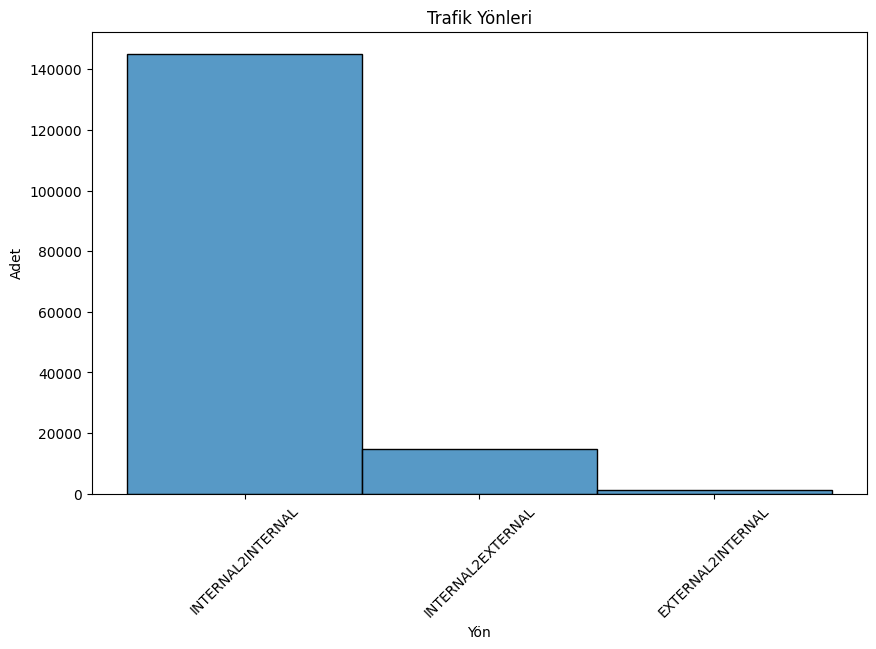

In [1134]:
plt.figure(figsize=(10,6))
sns.histplot(data=df['direction'])
plt.title('Trafik Yönleri')
plt.ylabel('Adet')
plt.xlabel('Yön')
plt.xticks(rotation=45)
plt.show();


####  En Çok Trafik Yapan  Adresler Hangileri ? 

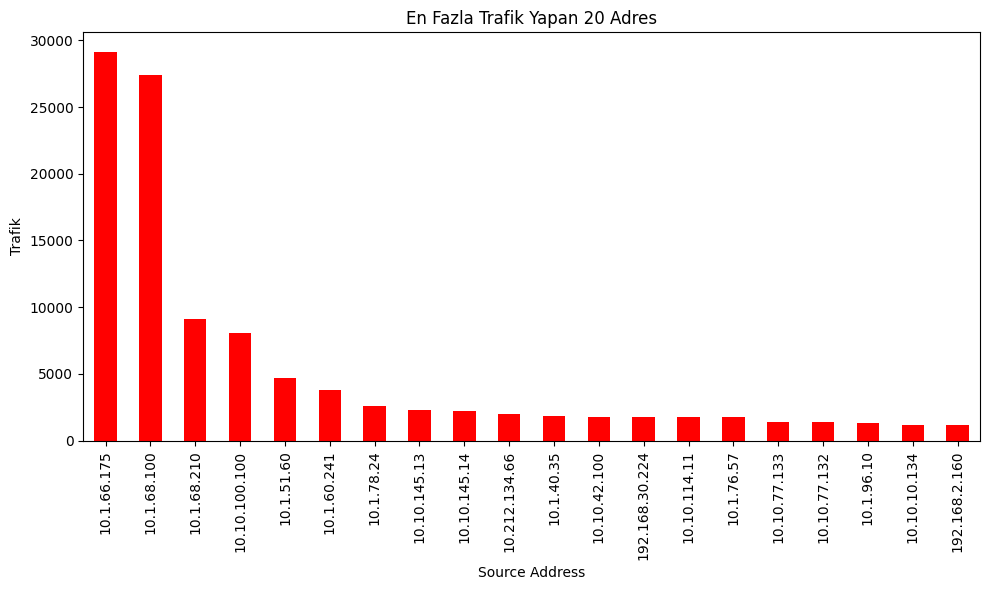

In [1019]:
# En fazla trafik yapan adreslere bakalım.
grouped_data = df.groupby('source_address').size().sort_values(ascending=False)
# İlk 20 kaydı görselleştiriyorum.
top_20 = grouped_data.head(20)
# Grafik çizimi
plt.figure(figsize=(10, 6))
top_20.plot(kind='bar', color='red')
plt.title('En Fazla Trafik Yapan 20 Adres')
plt.xlabel('Source Address')
plt.ylabel('Trafik')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

####  En Çok Veri İndiren Adresler Hangileri ?

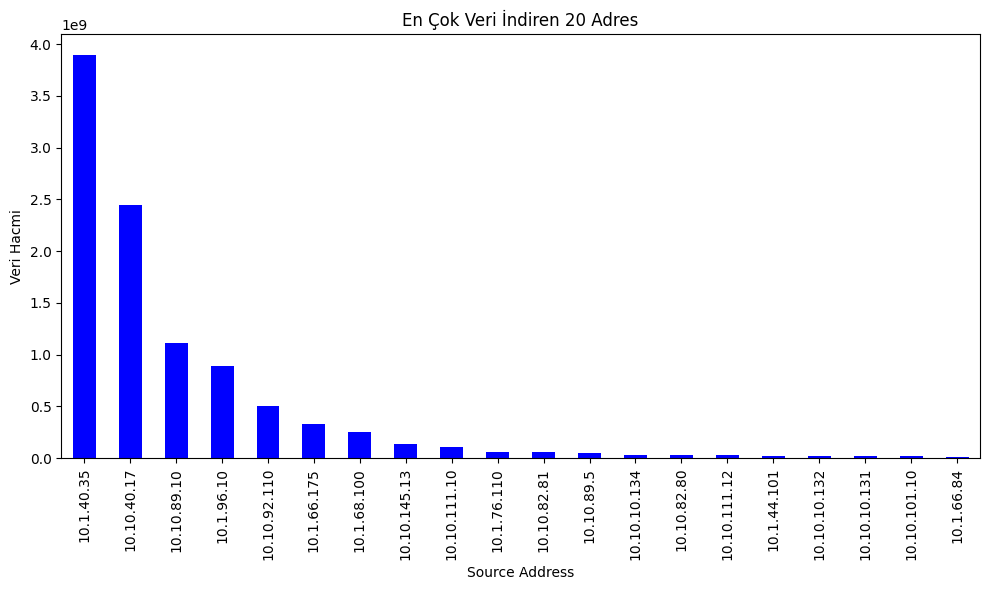

In [568]:
# En çok veri indiren adresler.
grouped_data = df.groupby('source_address')['dst2src_bytes'].sum().sort_values(ascending = False)
# İlk 20 kaydı görselleştiriyorum.
top_20 = grouped_data.head(20)
# Grafik çizimi
plt.figure(figsize=(10, 6))
top_20.plot(kind='bar', color='blue')
plt.title('En Çok Veri İndiren 20 Adres')
plt.xlabel('Source Address')
plt.ylabel('Veri Hacmi')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [421]:
# src2dst_bytes: "src2dst_bytes", kaynaktan (source) hedefe (destination) doğru iletilen bayt sayısını ifade eder.
# dst2src_bytes: "dst2src_bytes", hedeften (destination) kaynağa (source) doğru iletilen bayt sayısını ifade eder.
# bidirectional_bytes da ikisinin toplamı olmak durumunda.
# bidirectional_duration_ms : işlemin toplam süresini ifade ediyor.
# src2dst_duration_ms : kaynaktan - hedefe geçen süre.
# dst2src_duration_ms : hedeften - kaynağa geçen süre. 

In [132]:
df['timestamp'] = pd.to_datetime(df['event_time'])

In [133]:
df.set_index('timestamp' , inplace= True)
# Zaman grafikleri çizmeden önce indexleri zaman verileri haline getirdim.

####  Zamana Göre İşlem Hacimlerinin Durumu

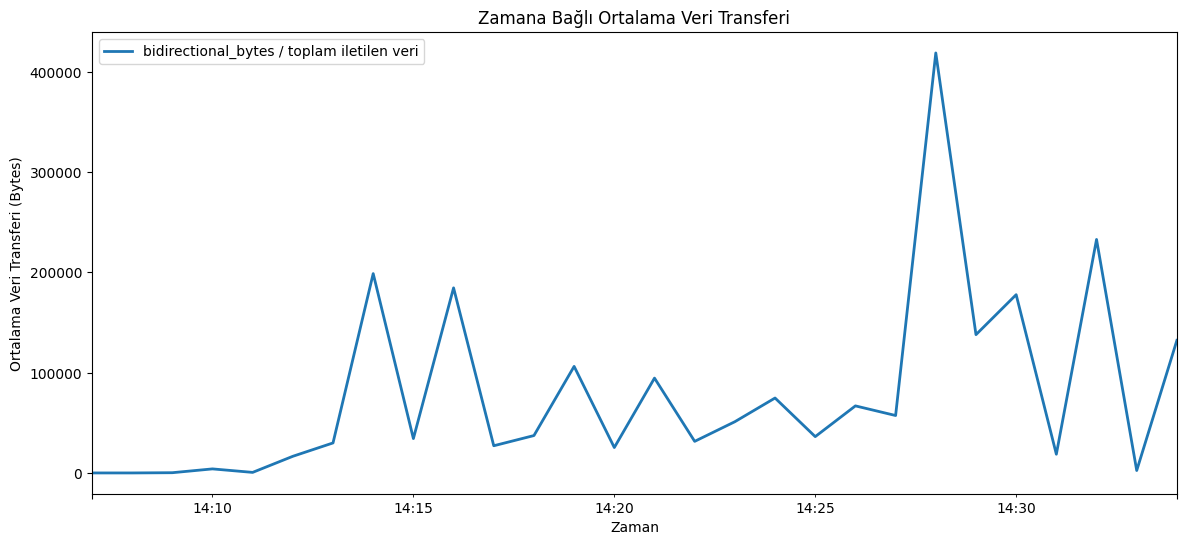

In [1146]:
%matplotlib inline
plt.figure(figsize=(14, 6))
df['bidirectional_bytes'].resample('T').mean().plot(linewidth = 2 ,  
                                                        label = 'bidirectional_bytes / toplam iletilen veri' )
plt.xlabel('Zaman')
plt.ylabel('Ortalama Veri Transferi (Bytes)')
plt.title('Zamana Bağlı Ortalama Veri Transferi')
#plt.xticks(df.resample('T').mean().index)
plt.legend()
plt.show()

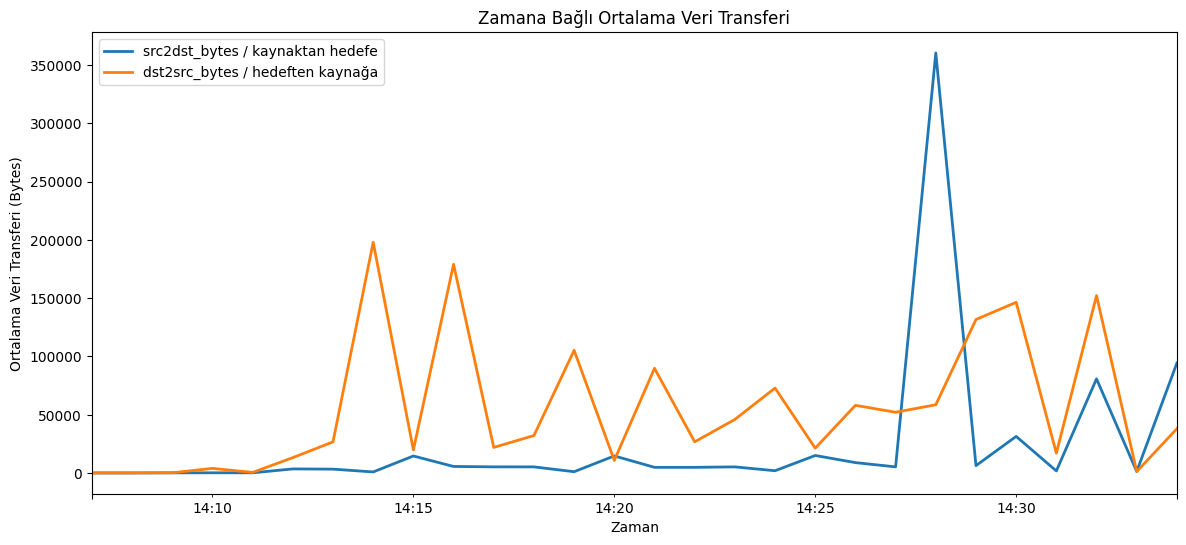

In [1083]:
%matplotlib inline
plt.figure(figsize=(14, 6))
df['src2dst_bytes'].resample('T').mean().plot(linewidth=2 , label = 'src2dst_bytes / kaynaktan hedefe')
df['dst2src_bytes'].resample('T').mean().plot(linewidth=2 , label = 'dst2src_bytes / hedeften kaynağa')
plt.xlabel('Zaman')
plt.ylabel('Ortalama Veri Transferi (Bytes)')
plt.title('Zamana Bağlı Ortalama Veri Transferi')
plt.legend()
plt.show()


  Yukarıdaki iki işlem hacmi - zaman grafiğine bakıldığında anormallikler görülmektedir. Anormal verileri ayrı 
olarak inceleyebiliriz:

- Anormal sayılabilecek verilerin hepsi içten içe trafik olarak gözükmektedir.
- Application_name biri hariç hepsinde TLS. TLS, internet üzerindeki iletişimin güvenliğini sağlamak için 
kullanılan bir kriptografik protokol.
- Bir Unknown işlemimiz var ve src2dst_bytes verisi anormal olan sadece o. 
- Bu Unknown işlem potansiyel bir siber saldırının göstergesi olabilir.(detaylı inceleme yapılmalı)

In [1085]:
# Anormal verilerin detaylarına bakalım.(Unknown işlem burda görülmekte.)
df.sort_values(by = 'bidirectional_bytes' , ascending = False).head(10)

,index,source_address,destination_address,source_port,destination_port,protocol,app_protocol,application_name,application_category_name,source_mac,destination_mac,package_count,login_fail_count,login_success,event_time,bidirectional_first_seen_ms,bidirectional_last_seen_ms,bidirectional_duration_ms,bidirectional_bytes,bidirectional_max_piat_ms,bidirectional_max_ps,bidirectional_mean_piat_ms,bidirectional_mean_ps,bidirectional_min_piat_ms,bidirectional_min_ps,bidirectional_packets,bidirectional_stddev_piat_ms,bidirectional_stddev_ps,bidirectional_syn_packets,bidirectional_cwr_packets,bidirectional_ece_packets,bidirectional_urg_packets,bidirectional_ack_packets,bidirectional_psh_packets,bidirectional_rst_packets,bidirectional_fin_packets,src2dst_first_seen_ms,src2dst_last_seen_ms,src2dst_duration_ms,src2dst_packets,src2dst_bytes,src2dst_max_piat_ms,src2dst_max_ps,src2dst_mean_piat_ms,src2dst_mean_ps,src2dst_min_piat_ms,src2dst_min_ps,src2dst_stddev_piat_ms,src2dst_stddev_ps,src2dst_syn_packets,src2dst_cwr_packets,src2dst_ece_packets,src2dst_urg_packets,src2dst_ack_packets,src2dst_psh_packets,src2dst_rst_packets,src2dst_fin_packets,dst2src_first_seen_ms,dst2src_last_seen_ms,dst2src_duration_ms,dst2src_packets,dst2src_bytes,dst2src_max_piat_ms,dst2src_max_ps,dst2src_mean_piat_ms,dst2src_mean_ps,dst2src_min_piat_ms,dst2src_min_ps,dst2src_stddev_piat_ms,dst2src_stddev_ps,dst2src_syn_packets,dst2src_cwr_packets,dst2src_ece_packets,dst2src_urg_packets,dst2src_ack_packets,dst2src_psh_packets,dst2src_rst_packets,dst2src_fin_packets,domain,dns_query_len,dns_answer_len,dns_not_exist,dns_query_has_sub_domain,DNS,status_code,bidirectional_http_request_count,bidirectional_get_request_count,bidirectional_get_request_bytes,bidirectional_post_request_count,bidirectional_post_request_bytes,src2dst_get_request_bytes,src2dst_post_request_bytes,dst2src_get_request_bytes,dst2src_post_request_bytes,direction,bidirectional_first_seen_ms_ts,bidirectional_last_seen_ms_ts,sourceCountry,destinationCountry,sourceGeoPoint,destinationGeoPoint,source_type,destination_type,protocol_name,density
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-03-18 14:28:57.186565316+00:00,123229,10.1.40.30,10.1.40.22,20703,8000,6,0,Unknown,Unspecified,f8:f2:1e:cd:62:b0,f8:f2:1e:cd:62:90,2117154,0,0,2024-03-18T14:28:57.186565316Z,1710771798567142,1710771802454394,3887252,2680427144,280724,1448,164,1266.052042,-15,0,2117154,255,474.989023,2,1,2,0,2117153,30664,0,2,1710771798567142,1710771802454394,3887252,1862505,2680427092,280724,1448,-4945830872400584353,1439.151622,0,0,0,85.702827,1,1,1,0,1862504,30662,0,1,1710771798567320,1710771802454236,3886916,254649,52,282742,36,182,0.000204,1,0,91701827759,0.078068,1,0,1,0,254649,2,0,1,NotFound,0,0,0,0,"{''large_package_count'': 0, ''dns_query_count...",0,1396836,1,1448,0,0,1448,0,0,0,INTERNAL2INTERNAL,2024-03-18T14:23:18.567142Z,2024-03-18T14:23:22.454394Z,"{''Latitude'': 40.92089, ''Longitude'': 29.313...","{''Latitude'': 40.92089, ''Longitude'': 29.313...","{''lat'': 40.92089, ''lon'': 29.31361}","{''lat'': 40.92089, ''lon'': 29.31361}",INTERNAL,INTERNAL,TCP,689.542933
2024-03-18 14:14:21.608631900+00:00,53808,10.1.40.35,10.1.40.22,59898,443,6,91,TLS,Web,00:50:56:a6:e2:95,f8:f2:1e:cd:62:90,1412516,0,0,2024-03-18T14:14:21.6086319Z,1710770960509457,1710771260502693,299993236,1778124867,256022,1448,1072,1258.835204,-15,0,1412516,2239,457.779688,0,0,0,0,1412516,120213,0,0,1710770960509457,1710771260502693,299993236,93227,1448,256337,1448,3063860227020121192,0.015532,2,0,0,4.742369,0,0,0,0,93227,0,0,0,1710770960509470,1710771260501410,299991940,1319289,1778123419,256374,1448,1227,1347.789164,1,36,7747229528927,323.232855,0,0,0,0,1319289,120213,0,0,NotFound,0,0,0,0,"{''large_package_count'': 0, ''dns_query_count...",0,1000222,0,0,0,0,0,0,0,0,INTERNAL2INTERNAL,2024-03-18T14:09:20.509457Z,2024-03-18T14:14:20.502693Z,"{''Latitude'': 40.92089, ''Longitude'': 29.313...","{'

####  En Yoğun Zaman Dilimleri 

  Yoğunluk diye bahsedilenden anladığım;  her eventde iletilen veri büyüklüğü ve ne kadar sürdüğü   bilgilerine sahibiz. 
  
  
  Belirli bir zaman diliminde iletilecek olan veri miktarı = Yoğunluk  

In [104]:
df['density'] = df['bidirectional_bytes'] / df['bidirectional_duration_ms']
# Veri büyüklüğünün 0 olduğu durumlarda  NaN değer dönecek.
df = df.fillna(0) #NaN değerleri 0 yapalım

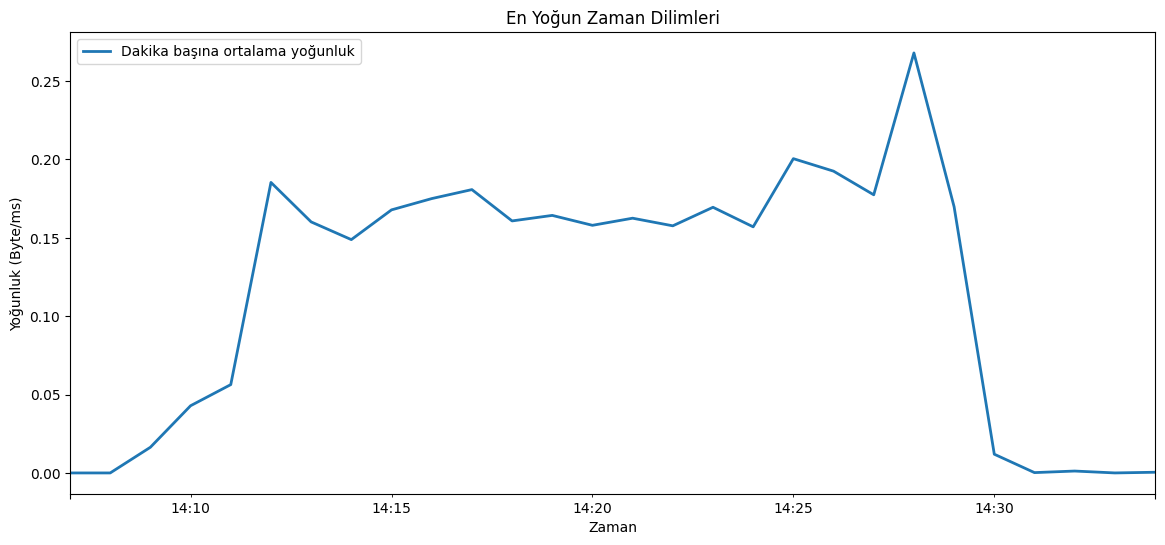

In [1131]:
%matplotlib inline
plt.figure(figsize=(14, 6))
df['density'].resample('T').mean().plot(linewidth=2 , label='Dakika başına ortalama yoğunluk')  
plt.xlabel('Zaman')
plt.ylabel('Yoğunluk (Byte/ms)')
plt.title('En Yoğun Zaman Dilimleri')
plt.legend()
plt.show()


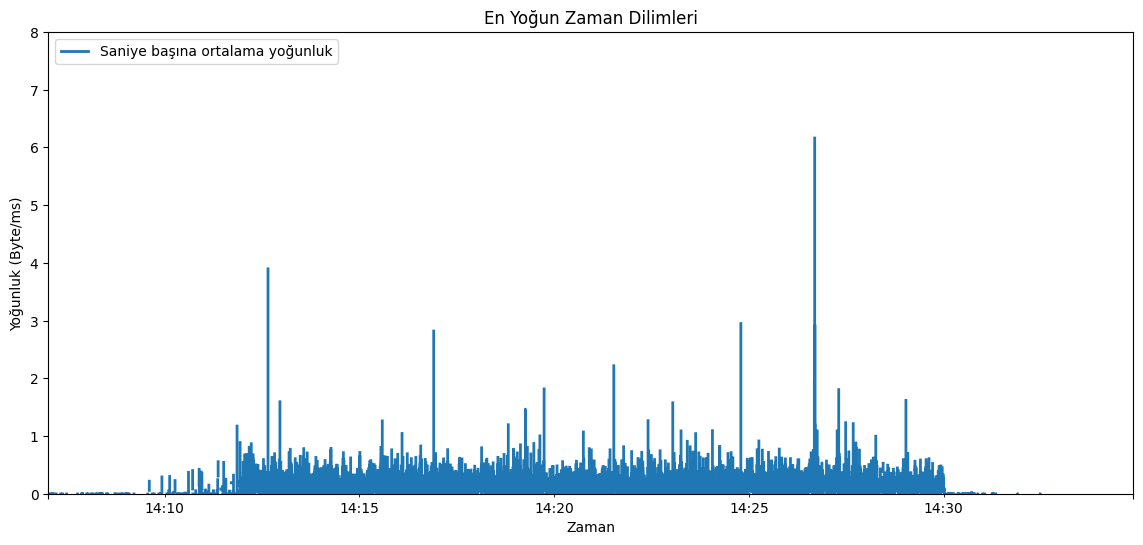

In [1115]:
%matplotlib inline
plt.figure(figsize=(14, 6))
df['density'].resample('L').mean().plot(linewidth=2 , label='Saniye başına ortalama yoğunluk')  
plt.xlabel('Zaman')
plt.ylabel('Yoğunluk (Byte/ms)')
plt.title('En Yoğun Zaman Dilimleri')
plt.ylim(0,8)
plt.legend()
plt.show()

İlk grafiğe baktığımızda en yoğun zaman dilimlerinin 14:12 - 14:29 arası olduğunu görüyoruz.

İlk grafik dakika ikinci grafik saniye hassasiyetinde.

Potansiyel tehlike olarak gördüğümüz hareketi ikinci grafikte tekrar görüyoruz.

###  Siber Saldırı Tespti

####  Bruteforce Saldırısı

   Bruteforce saldırısı ; bir bilgisayar sistemine veya hesaba, genellikle parola veya kimlik doğrulama yöntemi
kullanarak, zorlayıcı bir şekilde girmeye çalışan kötü niyetli bir saldırı türüdür. Saldırganlar,
otomatik programlar veya yazılımlar kullanarak, genellikle büyük bir parola listesini veya rastgele karakter 
kombinasyonlarını kullanarak sisteme sürekli deneme yaparlar.

   Bu tarz denemeleri tespit etmeye çalışalım.

In [581]:
df.groupby('source_address')['login_fail_count'].sum().sort_values(ascending = False)
# bu groupby sorgusu ile adreslerin toplam hatalı giriş deneme sayılarını bulduk.  
# 10.1.78.24 adresi 940 hatalı deneme yapmış. Bir Bruteforce saldırısı gibi gözüküyor.
# 10.212.134.77 adresi de 20 hatalı deneme yapmış detaylarına bakalım.

source_address
10.1.78.24         940
10.212.134.77       20
185.246.128.133      2
10.1.78.20           2
192.168.30.105       2
                  ... 
10.10.93.20          0
10.110.10.27         0
10.110.10.29         0
10.110.10.31         0
95.214.55.244        0
Name: login_fail_count, Length: 956, dtype: int64

In [850]:
df[(df.source_address == '10.212.134.77') & (df.login_fail_count == 1)].index
# '10.212.134.77' adresinin yaptığı başarısız giriş denemelerine bakıldığında bir pattern göze çarpıyor.
# Bu bir bot yardımı ile yapılan giriş denemeleri olduğunu gösteriyor olabilir.
# Bu patterni bir fonksiyon yardımı ile daha net şekilde göz önüne koyalım.

DatetimeIndex(['2024-03-18 14:19:00.277670330+00:00',
               '2024-03-18 14:19:01.224129814+00:00',
               '2024-03-18 14:19:42.333529248+00:00',
               '2024-03-18 14:19:43.349545374+00:00',
               '2024-03-18 14:20:23.376318714+00:00',
               '2024-03-18 14:20:23.376343242+00:00',
               '2024-03-18 14:21:05.281584471+00:00',
               '2024-03-18 14:21:05.702059694+00:00',
               '2024-03-18 14:21:47.601308236+00:00',
               '2024-03-18 14:21:47.619361702+00:00',
               '2024-03-18 14:22:29.792892116+00:00',
               '2024-03-18 14:22:29.809794564+00:00',
               '2024-03-18 14:23:13.787529815+00:00',
               '2024-03-18 14:23:13.801729975+00:00',
               '2024-03-18 14:23:55.993667134+00:00',
               '2024-03-18 14:23:55.993690300+00:00',
               '2024-03-18 14:24:39.545752678+00:00',
               '2024-03-18 14:24:39.768704985+00:00',
               '2024-03-18 1

In [847]:
# 10.212.134.77 IP ADRESİNDEN GELEN DENEMELER
deneme_sayisi = len(df[(df.source_address == '10.212.134.77') & (df.login_fail_count == 1)].index)
time  = df[(df.source_address == '10.212.134.77') & (df.login_fail_count == 1)].index

for deneme in range (deneme_sayisi-2) : 
    print(f'Saldırılar arası geçen süre : {(time[deneme+1] - time[deneme]).total_seconds()} saniye')
# pattern rahat şekilde görülebiliyor.

Saldırılar arası geçen süre : 0.946459 saniye
Saldırılar arası geçen süre : 41.109399 saniye
Saldırılar arası geçen süre : 1.016016 saniye
Saldırılar arası geçen süre : 40.026773 saniye
Saldırılar arası geçen süre : 2.4e-05 saniye
Saldırılar arası geçen süre : 41.905241 saniye
Saldırılar arası geçen süre : 0.420475 saniye
Saldırılar arası geçen süre : 41.899248 saniye
Saldırılar arası geçen süre : 0.018053 saniye
Saldırılar arası geçen süre : 42.17353 saniye
Saldırılar arası geçen süre : 0.016902 saniye
Saldırılar arası geçen süre : 43.977735 saniye
Saldırılar arası geçen süre : 0.0142 saniye
Saldırılar arası geçen süre : 42.191937 saniye
Saldırılar arası geçen süre : 2.3e-05 saniye
Saldırılar arası geçen süre : 43.552062 saniye
Saldırılar arası geçen süre : 0.222952 saniye
Saldırılar arası geçen süre : 39.408048 saniye


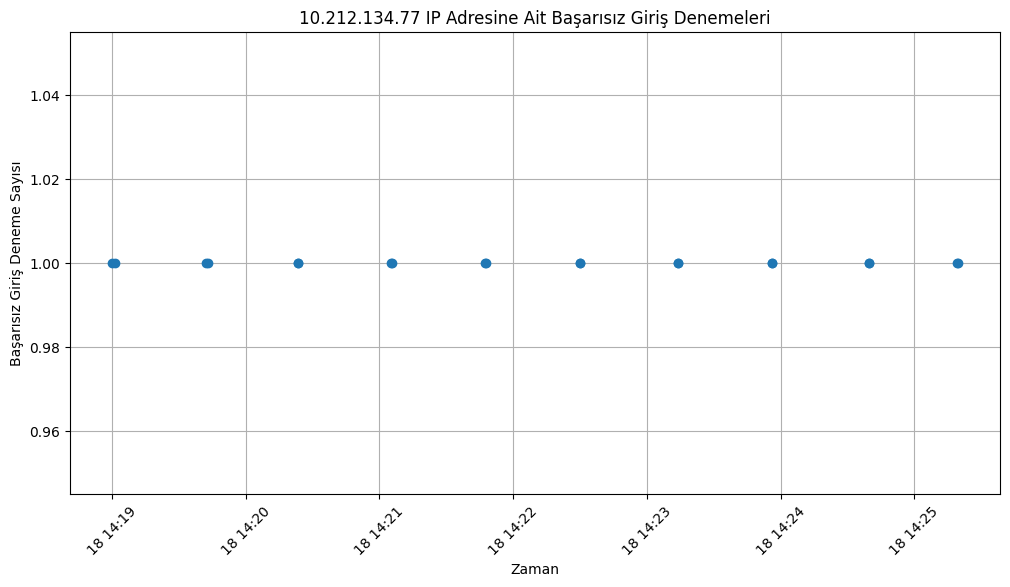

In [172]:
import matplotlib.pyplot as plt
# Bir grafik ile de bunu görelim.

fail = df[(df['source_address'] == '10.212.134.77') & (df['login_fail_count'] == 1)]

plt.figure(figsize=(12, 6))
plt.plot(fail.index, fail['login_fail_count'], marker='o', linestyle='')
plt.title('10.212.134.77 IP Adresine Ait Başarısız Giriş Denemeleri')
plt.xlabel('Zaman')
plt.ylabel('Başarısız Giriş Deneme Sayısı')
plt.grid(True)

plt.xticks(rotation=45)
plt.show()


In [848]:
# 10.1.78.24 IP ADRESİNDEN GELEN DENEMELER
deneme_sayisi = len(df[(df.source_address == '10.1.78.24') & (df.login_fail_count == 1)].index)
time  = df[(df.source_address == '10.1.78.24') & (df.login_fail_count == 1)].index

for deneme in range (deneme_sayisi-2) : 
    print(f'Saldırılar arası geçen süre : {(time[deneme+1] - time[deneme]).total_seconds()} saniye')

Saldırılar arası geçen süre : 0.009765 saniye
Saldırılar arası geçen süre : 2.1e-05 saniye
Saldırılar arası geçen süre : 2.3e-05 saniye
Saldırılar arası geçen süre : 1.9e-05 saniye
Saldırılar arası geçen süre : 1.9e-05 saniye
Saldırılar arası geçen süre : 2.1e-05 saniye
Saldırılar arası geçen süre : 1.9e-05 saniye
Saldırılar arası geçen süre : 2e-05 saniye
Saldırılar arası geçen süre : 2.1e-05 saniye
Saldırılar arası geçen süre : 1.9e-05 saniye
Saldırılar arası geçen süre : 2e-05 saniye
Saldırılar arası geçen süre : 1.9e-05 saniye
Saldırılar arası geçen süre : 7.5e-05 saniye
Saldırılar arası geçen süre : 2e-05 saniye
Saldırılar arası geçen süre : 1.9e-05 saniye
Saldırılar arası geçen süre : 1.9e-05 saniye
Saldırılar arası geçen süre : 2e-05 saniye
Saldırılar arası geçen süre : 0.045872 saniye
Saldırılar arası geçen süre : 2.4e-05 saniye
Saldırılar arası geçen süre : 2.2e-05 saniye
Saldırılar arası geçen süre : 2.2e-05 saniye
Saldırılar arası geçen süre : 2.2e-05 saniye
Saldırılar arası

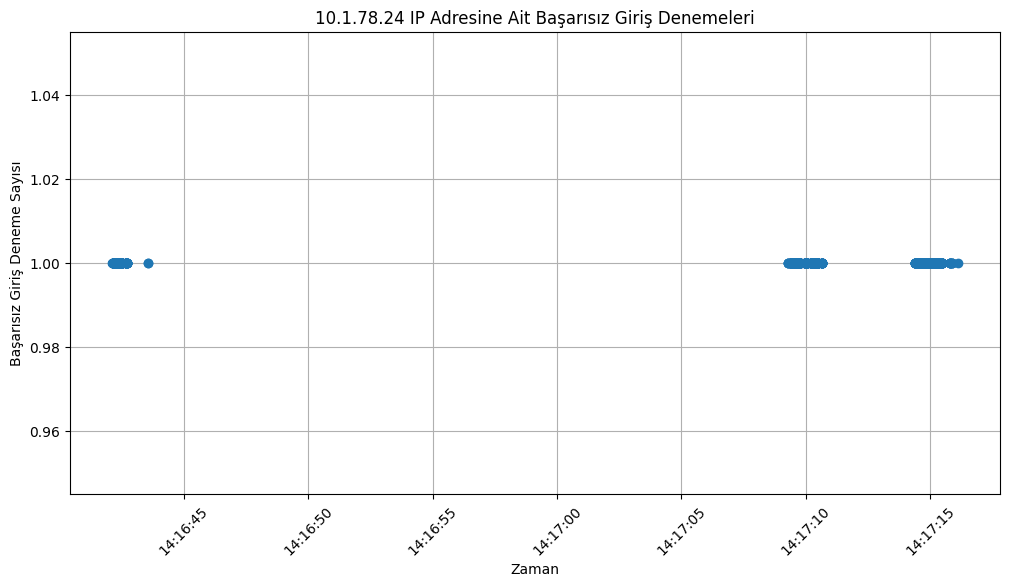

In [173]:
import matplotlib.pyplot as plt


fail = df[(df['source_address'] == '10.1.78.24') & (df['login_fail_count'] == 1)]

# Zaman serisi grafiği çizme
plt.figure(figsize=(12, 6))
plt.plot(fail.index, fail['login_fail_count'], marker='o', linestyle='')
plt.title('10.1.78.24 IP Adresine Ait Başarısız Giriş Denemeleri')
plt.xlabel('Zaman')
plt.ylabel('Başarısız Giriş Deneme Sayısı')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [1142]:
print(f"destination_address :" 
    f"{df[(df.source_address == '10.1.78.24') & (df.login_fail_count == 1)]['destination_address'].value_counts()}") 

print()

print(f"application_name :" 
    f"{df[(df.source_address == '10.1.78.24') & (df.login_fail_count == 1)]['application_name'].value_counts()}")
# yukarıdaki sorgulara baktığımızda, 940 denemenin hepsinin aynı adrese yapılmış olduğunu görüyoruz.

# Saldıran IP : 10.1.78.24 
# Hedef IP : 10.1.78.10

destination_address :10.1.78.10    940
Name: destination_address, dtype: int64

application_name :NetBIOS.SMBv23    940
Name: application_name, dtype: int64


In [1143]:
print(f"destination_address :" 
f"{df[(df.source_address == '10.212.134.77') & (df.login_fail_count == 1)]['destination_address'].value_counts()}") 

print()

print(f"application_name :" 
f"{df[(df.source_address == '10.212.134.77') & (df.login_fail_count == 1)]['application_name'].value_counts()}")
# yukarıdaki sorgulara baktığımızda, 20 denemenin hepsinin aynı adrese yapılmış olduğunu görüyoruz.

# Saldıran IP : 10.212.134.77 
# Hedef IP : 10.1.78.12

destination_address :10.1.78.12    20
Name: destination_address, dtype: int64

application_name :SSH    20
Name: application_name, dtype: int64


In [175]:
# Saldırı verilerini ayrı bir dataframe'e çekiyorum.
brute_force_df1 = df[(df.source_address == '10.1.78.24') & (df.login_fail_count == 1)]
brute_force_df2 = df[(df.source_address == '10.212.134.77') & (df.login_fail_count == 1)]

In [176]:
print('--------------------Bruteforce Saldırısı Özet--------------------')
print('Saldıran IP : 10.1.78.24')
print('Hedef IP    : 10.1.78.10')
print(f'Saldırının başlangıc zamanı : {brute_force_df1.index[0].strftime("%Y-%m-%d %H:%M:%S.%f%z")}') 
print(f'Saldırının bitiş zamanı     : {brute_force_df1.index[-1].strftime("%Y-%m-%d %H:%M:%S.%f%z")}') 
print(f'Saldırı {(brute_force_df1.index[-1] - brute_force_df1.index[0]).total_seconds()} saniye sürmüş.')
print(f'Saldırının konum bilgileri : {brute_force_df1["sourceCountry"][0]}')
print('----------------------------------------------------------------------------------------------------------')
print('Saldıran IP : 10.212.134.77')
print('Hedef IP    : 10.1.78.12')
print(f'Saldırının başlangıc zamanı : {brute_force_df2.index[0].strftime("%Y-%m-%d %H:%M:%S.%f%z")}') 
print(f'Saldırının bitiş zamanı     : {brute_force_df2.index[-1].strftime("%Y-%m-%d %H:%M:%S.%f%z")}') 
print(f'Saldırı {(brute_force_df2.index[-1] - brute_force_df2.index[0]).total_seconds()} saniye sürmüş. (Bu saldırının belli aralıklarla yapıldığını grafikte görmüştük saldırı süresini analiz ederken dikkatli olmamız gerekir.)')
print(f'Saldırının konum bilgileri : {brute_force_df2["sourceCountry"][0]}')

--------------------Bruteforce Saldırısı Özet--------------------
Saldıran IP : 10.1.78.24
Hedef IP    : 10.1.78.10
Saldırının başlangıc zamanı : 2024-03-18 14:16:42.123503+0000
Saldırının bitiş zamanı     : 2024-03-18 14:17:16.111317+0000
Saldırı 33.987813 saniye sürmüş.
Saldırının konum bilgileri : {''Latitude'': 40.92089, ''Longitude'': 29.31361, ''CityName'': ''İstanbul'', ''SubdivisionName'': ''Pendik'', ''CountryNames'': ''Turkey'', ''IsoCode'': ''TUR''}
----------------------------------------------------------------------------------------------------------
Saldıran IP : 10.212.134.77
Hedef IP    : 10.1.78.12
Saldırının başlangıc zamanı : 2024-03-18 14:19:00.277670+0000
Saldırının bitiş zamanı     : 2024-03-18 14:25:19.494568+0000
Saldırı 379.216898 saniye sürmüş. (Bu saldırının belli aralıklarla yapıldığını grafikte görmüştük saldırı süresini analiz ederken dikkatli olmamız gerekir.)
Saldırının konum bilgileri : {''Latitude'': 40.92089, ''Longitude'': 29.31361, ''CityName'': '

####  Arp Scan

In [917]:
df[df.application_category_name == 'ARP'].shape

(11478, 105)

In [893]:
df[df.application_name == 'ARP-Request'][['source_address','destination_address']].value_counts()
# Aşşağıda görüldüğü üzere aynı adresten, aynı adrese sıklıkla ARP-Request gönderme durumu var.

source_address  destination_address
10.10.10.120    10.10.10.1             818
10.1.66.11      10.1.66.12             810
192.168.2.160   192.168.1.150          740
192.168.1.100   192.168.0.1            398
192.168.10.2    192.168.10.1           388
                                      ... 
10.1.71.254     10.1.71.10               1
10.10.111.254   10.10.111.10             1
10.1.76.254     10.1.76.110              1
10.10.111.12    10.10.111.11             1
10.10.145.11    10.10.145.254            1
Length: 553, dtype: int64

In [904]:
df[df.application_name == 'ARP-Reply'][['source_address','destination_address']].value_counts()
# Burada da adreslerin gelen Requestlere Reply gönderme sayılarını görüyoruz.

source_address  destination_address
10.1.40.254     10.1.40.100            83
10.10.89.254    10.10.89.5             52
10.10.10.120    10.10.10.140           39
10.10.100.254   10.10.100.105          35
10.10.107.254   10.10.107.11           30
                                       ..
10.1.40.35      10.1.40.30              1
10.1.42.140     10.1.42.254             1
10.10.100.105   10.10.100.101           1
10.10.100.101   10.10.100.254           1
10.1.40.100     10.1.40.1               1
Length: 278, dtype: int64

In [946]:
# en çok ARP-Request gönderen 10 IP
df[df.application_name == 'ARP-Request'].source_address.value_counts().head(10)

10.10.10.120     822
10.1.66.11       814
192.168.2.160    813
10.1.78.24       513
192.168.1.100    412
192.168.10.2     412
192.168.100.2    289
192.168.2.100    284
10.10.10.140     270
10.10.10.132     270
Name: source_address, dtype: int64

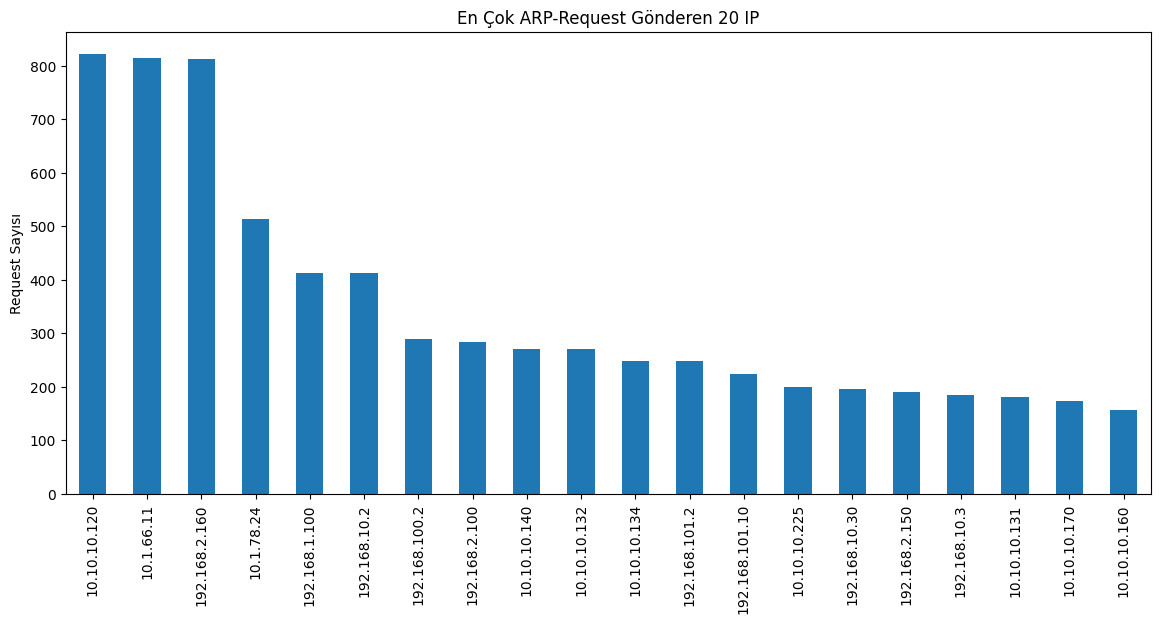

In [186]:
most_request = df[df.application_name == 'ARP-Request'].source_address.value_counts()
top20 = most_request.head(20)

plt.figure(figsize = (14,6))
top20.plot(kind = 'bar')
plt.title('En Çok ARP-Request Gönderen 20 IP')
plt.ylabel('Request Sayısı')
plt.show();

In [935]:
# ARP-Requestlerin destination_mac bilgilerine bakınca , yüksek oranda broadcast olduklarını gördüm.
# Ağdaki diğer cihazlarının MAC adreslerini öğrenmek adına bir girişim.
# Bu bir saldırı olabileceği gibi , normal bir durumda olabilir. 
# Alan bilgisi eksikliğimden dolayı tam olarak bir yorum yapamıyorum.
requests = list(df[df.application_name == 'ARP-Request'].source_address.value_counts().head(10).index)
for i in requests :
    print(df[(df.application_name == 'ARP-Request') & (df.source_address == i)].destination_mac.value_counts())

ff:ff:ff:ff:ff:ff    818
00:50:56:a6:30:5b      4
Name: destination_mac, dtype: int64
ff:ff:ff:ff:ff:ff    810
00:1b:17:00:03:40      4
Name: destination_mac, dtype: int64
ff:ff:ff:ff:ff:ff    806
00:50:56:a6:4d:5e      7
Name: destination_mac, dtype: int64
ff:ff:ff:ff:ff:ff    498
00:1b:17:00:03:40     14
00:50:56:a6:e8:ef      1
Name: destination_mac, dtype: int64
ff:ff:ff:ff:ff:ff    398
00:50:56:a6:4d:5e     14
Name: destination_mac, dtype: int64
ff:ff:ff:ff:ff:ff    388
00:50:56:a6:80:59     15
00:50:56:a6:14:97      9
Name: destination_mac, dtype: int64
ff:ff:ff:ff:ff:ff    280
00:50:56:a6:00:18      9
Name: destination_mac, dtype: int64
ff:ff:ff:ff:ff:ff    250
00:50:56:a6:45:7d     22
00:50:56:a6:79:70     12
Name: destination_mac, dtype: int64
ff:ff:ff:ff:ff:ff    220
00:50:56:a6:01:a6     39
00:50:56:a6:30:5b     11
Name: destination_mac, dtype: int64
ff:ff:ff:ff:ff:ff    270
Name: destination_mac, dtype: int64


In [1144]:
# En çok request gönderen 10 IP kaç kez cevap almış ? 
requests = list(df[df.application_name == 'ARP-Request'].source_address.value_counts().head(10).index)

for i in requests :
    print(f"{i}'nin aldığı cevap sayısı :"   
          f"{len(df[(df.application_name == 'ARP-Reply') & (df.destination_address == i)])}")
 

10.10.10.120'nin aldığı cevap sayısı :4
10.1.66.11'nin aldığı cevap sayısı :4
192.168.2.160'nin aldığı cevap sayısı :7
10.1.78.24'nin aldığı cevap sayısı :24
192.168.1.100'nin aldığı cevap sayısı :14
192.168.10.2'nin aldığı cevap sayısı :24
192.168.100.2'nin aldığı cevap sayısı :9
192.168.2.100'nin aldığı cevap sayısı :34
10.10.10.140'nin aldığı cevap sayısı :50
10.10.10.132'nin aldığı cevap sayısı :0


#### Exfiltration

In [961]:
df[df['index'] == 123229]['src2dst_bytes']
# bu işlemin normalden çok yüksek ,aykırı  bir src2dst_bytes verisine sahip olduğunu bulmuştuk. 
# bu bir bilgi sızdırma  durumu olabilir.

timestamp
2024-03-18 14:28:57.186565316+00:00    2680427092
Name: src2dst_bytes, dtype: int64

In [962]:
df[df['index'] == 123229]

,index,source_address,destination_address,source_port,destination_port,protocol,app_protocol,application_name,application_category_name,source_mac,destination_mac,package_count,login_fail_count,login_success,event_time,bidirectional_first_seen_ms,bidirectional_last_seen_ms,bidirectional_duration_ms,bidirectional_bytes,bidirectional_max_piat_ms,bidirectional_max_ps,bidirectional_mean_piat_ms,bidirectional_mean_ps,bidirectional_min_piat_ms,bidirectional_min_ps,bidirectional_packets,bidirectional_stddev_piat_ms,bidirectional_stddev_ps,bidirectional_syn_packets,bidirectional_cwr_packets,bidirectional_ece_packets,bidirectional_urg_packets,bidirectional_ack_packets,bidirectional_psh_packets,bidirectional_rst_packets,bidirectional_fin_packets,src2dst_first_seen_ms,src2dst_last_seen_ms,src2dst_duration_ms,src2dst_packets,src2dst_bytes,src2dst_max_piat_ms,src2dst_max_ps,src2dst_mean_piat_ms,src2dst_mean_ps,src2dst_min_piat_ms,src2dst_min_ps,src2dst_stddev_piat_ms,src2dst_stddev_ps,src2dst_syn_packets,src2dst_cwr_packets,src2dst_ece_packets,src2dst_urg_packets,src2dst_ack_packets,src2dst_psh_packets,src2dst_rst_packets,src2dst_fin_packets,dst2src_first_seen_ms,dst2src_last_seen_ms,dst2src_duration_ms,dst2src_packets,dst2src_bytes,dst2src_max_piat_ms,dst2src_max_ps,dst2src_mean_piat_ms,dst2src_mean_ps,dst2src_min_piat_ms,dst2src_min_ps,dst2src_stddev_piat_ms,dst2src_stddev_ps,dst2src_syn_packets,dst2src_cwr_packets,dst2src_ece_packets,dst2src_urg_packets,dst2src_ack_packets,dst2src_psh_packets,dst2src_rst_packets,dst2src_fin_packets,domain,dns_query_len,dns_answer_len,dns_not_exist,dns_query_has_sub_domain,DNS,status_code,bidirectional_http_request_count,bidirectional_get_request_count,bidirectional_get_request_bytes,bidirectional_post_request_count,bidirectional_post_request_bytes,src2dst_get_request_bytes,src2dst_post_request_bytes,dst2src_get_request_bytes,dst2src_post_request_bytes,direction,bidirectional_first_seen_ms_ts,bidirectional_last_seen_ms_ts,sourceCountry,destinationCountry,sourceGeoPoint,destinationGeoPoint,source_type,destination_type,protocol_name,density
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-03-18 14:28:57.186565316+00:00,123229,10.1.40.30,10.1.40.22,20703,8000,6,0,Unknown,Unspecified,f8:f2:1e:cd:62:b0,f8:f2:1e:cd:62:90,2117154,0,0,2024-03-18T14:28:57.186565316Z,1710771798567142,1710771802454394,3887252,2680427144,280724,1448,164,1266.052042,-15,0,2117154,255,474.989023,2,1,2,0,2117153,30664,0,2,1710771798567142,1710771802454394,3887252,1862505,2680427092,280724,1448,-4945830872400584353,1439.151622,0,0,0,85.702827,1,1,1,0,1862504,30662,0,1,1710771798567320,1710771802454236,3886916,254649,52,282742,36,182,0.000204,1,0,91701827759,0.078068,1,0,1,0,254649,2,0,1,NotFound,0,0,0,0,"{''large_package_count'': 0, ''dns_query_count...",0,1396836,1,1448,0,0,1448,0,0,0,INTERNAL2INTERNAL,2024-03-18T14:23:18.567142Z,2024-03-18T14:23:22.454394Z,"{''Latitude'': 40.92089, ''Longitude'': 29.313...","{''Latitude'': 40.92089, ''Longitude'': 29.313...","{''lat'': 40.92089, ''lon'': 29.31361}","{''lat'': 40.92089, ''lon'': 29.31361}",INTERNAL,INTERNAL,TCP,689.542933


#    Siber Ağ Trafik Analizi Raporu


## - Giriş

  Bu rapor, bir şirketin ağ trafik verileri üzerinde yapılan analiz sonuçlarını sunmaktadır. 
Analiz, şirketin ağ güvenliği ve performansını değerlendirmek amacıyla gerçekleştirilmiştir. 
    

##  - Metodoloji

Bu analizde Tanımsal Analiz (Descriptive Analysis) metodolojisi kullanılmıştır.

Tüm veriyi özetleyerek ve görselleştirerek kullanıcıya sunar. Ortalama, yoğunluk gibi hesaplamaları sürekli 
verilerde; frekans gibi hesaplamaları kategorik verilerde uygular. Verilerin sayısal olarak sınıflandırılmasını, veriden anlam çıkarılmasını kolaylaştırır.

Veri Toplama: İlgili ağ cihazlarından gelen trafik verileri toplanmıştır.

Veri Temizleme ve Düzenleme: Toplanan veriler temizlenmiş, gereksiz sütunlar kaldırılmıştır.

Veri Analizi: Temizlenmiş veriler üzerinde çeşitli analiz teknikleri uygulanmıştır, bu analizler ağ trafiği desenlerini, tehditleri ve performansı değerlendirmeyi amaçlamıştır.

##  - Bulgular

Analiz sonuçlarına göre elde edilen bulgular aşağıda özetlenmiştir:

<h4>Trafik Yoğunluğu : </h4>

En fazla trafik yapan ve en çok veri indiren adresler ayrı ayrı tespit edilmiştir. Zamana bağlı ortalama veri transferleri çift yönlü olacak şekilde incelenmiş, ortalama veri 
transferlerinin en yüksek olduğu zamanlar belirlenmiştir.Trafik yoğunluğu belirlenmiş(belirli bir zaman diliminde iletilen veri miktarı.), ve en yüksek yoğunluklu zaman dilimleri tespit edilmiştir. Bu tespitlerin hepsi görsellerle desteklenmiştir.

<h4>Tehditler : </h4>

Ağ trafiği incelenerek potansiyel tehditler ve saldırı girişimleri tespit edilmiştir. Özellikle bruteforce saldırısı ve arp scan üzerinde durulmuştur.

##  - Tavsiyeler

<h4>Güvenlik Güncellemeleri : </h4>

Ağ güvenliğini artırmak için güvenlik duvarı ve diğer güvenlik cihazlarının güncellemeleri düzenli olarak yapılmalıdır.

<h4>Trafik Yönetimi :</h4> 

Yoğun trafik saatlerinde ağ kaynaklarını etkin bir şekilde yönetmek için trafik yönetimi stratejileri uygulanmalıdır.

<h4>Eğitim ve Farkındalık :</h4> 

Personel, güvenlik politikaları ve tehditler konusunda düzenli eğitimler almalı ve bilinçlendirilmelidir.

###  -Sonuç

Bu rapor, şirketin ağ trafik verileri üzerinde yapılan analiz sonuçlarını özetlemektedir. Bulgular, şirketin ağ güvenliği ve performansını iyileştirmek için alınması gereken önlemleri belirlemekte kullanılabilir.